
# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Scraping

The most important first step in any machine learning project is to obtain good quality data.

Web scraping is used to download data from a website and extract the required information from those pages. There are a number of python libraries that can be used for this. Here, we'll be using openml.

OpenML (Open Media Library), a free, cross-platform programming environment designed by the Khronos Group for capturing, transporting, processing, displaying, and synchronizing digital media

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
dataset=fetch_openml('mnist_784')

In [4]:
X=dataset.data
y=dataset.target

In [5]:
# y string format mei hai isko integer mei badlna padega 

In [6]:
y=y.astype('int32')


# Discovery and Visualization

Data visualization is the representation of data or information in a graph, chart, or other visual format. It Data visualization is the representation of data or information in a graph, chart, or other visual format. It communicates relationships of the data with images. This is important because it allows trends and patterns to be more easily seen. With the rise of big data upon us, we need to be able to interpret increasingly larger batches of data.

# displaying a single image 

<function matplotlib.pyplot.show(*args, **kw)>

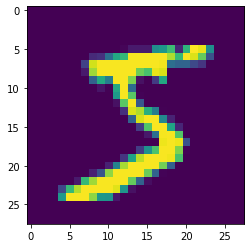

In [7]:
some_digit= X[0]
some_digit_image= some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show

# Grey Scale

A grayscale (or graylevel) image is simply one in which the only colors are shades of grey Often, the grayscale intensity is stored as an 8-bit integer giving 256 possible different shades of gray from black to white.

<function matplotlib.pyplot.show(*args, **kw)>

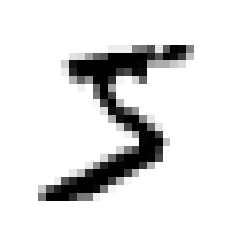

In [8]:
plt.imshow(some_digit_image,"binary")
plt.axis('off')
plt.show

# Loop to visualize multiple images simultaneoulsly

# displaying few images in grey format


<function matplotlib.pyplot.show(*args, **kw)>

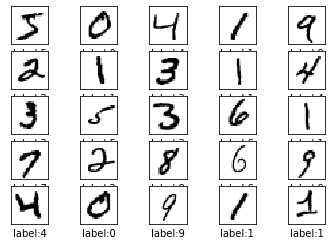

In [9]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    im=X[i]
    im=im.reshape(28,28)
    plt.imshow(im,"binary")
    plt.xlabel("label:{}".format(y[i]))
plt.show

In [10]:
# Data preprocessing ki need nhi hai

In [11]:
# Separating train and test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Select and train a ML algo

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_train,y_train)
log_reg.score(X_test,y_test)

y_pred_log=log_reg.predict(X_test)


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
len(X_train)

52500

In [22]:
len(y_train)

52500

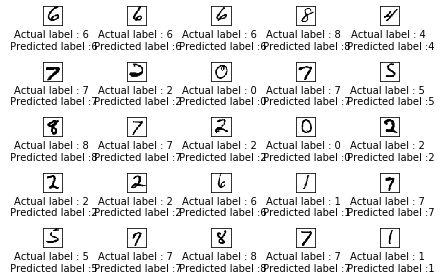

In [23]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    im=X_test[i]
    im=im.reshape(28,28)
    plt.imshow(im,"binary")
    plt.xlabel("Actual label : {} \n Predicted label :{}".format(y_test[i],y_pred_log[i]))
    
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm_log=confusion_matrix(y_test,y_pred_log)

In [26]:
# Overlap remove karne ke lie tight label ka use karenge

In [27]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [28]:
precision_score(y_test,y_pred_log,average="micro")

0.9194285714285715

In [29]:
recall_score(y_test,y_pred_log,average="micro")

0.9194285714285715

In [45]:
f1_score(y_test,y_pred_log,average="micro")

0.9194285714285715

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_log))

[[1622    0    6    2    2   12   13    4    7    0]
 [   0 1925    6    3    0    6    1    3   11    4]
 [  10   22 1521   33   23   10   23   21   47    6]
 [   4   10   38 1635    0   56    6   15   33   14]
 [   7    7   18    4 1593    3   23    7   14   67]
 [  20    8   13   54   13 1383   24    5   49   12]
 [   9    5   20    1   12   25 1670    3    9    0]
 [  10   10   25    8   21    4    1 1669    6   57]
 [   7   33   20   49    6   54   15    7 1500   33]
 [  11    3    7   28   43   10    2   42   15 1572]]


In [48]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1668
           1       0.95      0.98      0.97      1959
           2       0.91      0.89      0.90      1716
           3       0.90      0.90      0.90      1811
           4       0.93      0.91      0.92      1743
           5       0.88      0.87      0.88      1581
           6       0.94      0.95      0.95      1754
           7       0.94      0.92      0.93      1811
           8       0.89      0.87      0.88      1724
           9       0.89      0.91      0.90      1733

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtf=DecisionTreeClassifier()
dtf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
dtf.score(X_train,y_train)
dtf.score(X_test,y_test)

y_pred_dtf=dtf.predict(X_test)

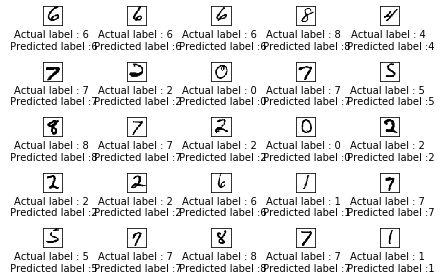

In [52]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    im=X_test[i]
    im=im.reshape(28,28)
    plt.imshow(im,"binary")
    plt.xlabel("Actual label : {} \n Predicted label :{}".format(y_test[i],y_pred_dtf[i]))
    
plt.tight_layout()
plt.show()

In [53]:
precision_score(y_test,y_pred_dtf,average="micro")

0.8713142857142857

In [54]:
recall_score(y_test,y_pred_dtf,average="micro")

0.8713142857142857

In [55]:
f1_score(y_test,y_pred_dtf,average="micro")

0.8713142857142857

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_dtf))


[[1561    0   17   15   10   16   22    5   19    3]
 [   0 1878   15   14    7    9    4   11   17    4]
 [  13   14 1479   43   20   10   27   37   58   15]
 [  14   13   45 1536   16   76   19   32   39   21]
 [  12    8   21    4 1514   17   25   26   26   90]
 [  24   14   12   69   18 1312   38    9   43   42]
 [  28    9   26   10   34   46 1549    7   38    7]
 [   7   14   30   22   26   12    3 1626   23   48]
 [  16   17   59   66   36   57   26   19 1366   62]
 [  18    8   14   31   87   39    5   47   57 1427]]


In [57]:
print(classification_report(y_test, y_pred_dtf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1668
           1       0.95      0.96      0.95      1959
           2       0.86      0.86      0.86      1716
           3       0.85      0.85      0.85      1811
           4       0.86      0.87      0.86      1743
           5       0.82      0.83      0.83      1581
           6       0.90      0.88      0.89      1754
           7       0.89      0.90      0.90      1811
           8       0.81      0.79      0.80      1724
           9       0.83      0.82      0.83      1733

    accuracy                           0.87     17500
   macro avg       0.87      0.87      0.87     17500
weighted avg       0.87      0.87      0.87     17500

